##Resampling & Regularization #CODEDANIEL


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**import numpy as np:** This imports the NumPy library and gives it the alias np for convenience.

**import pandas as pd:** This imports the Pandas library and gives it the alias pd for convenience.

**import matplotlib.pyplot as plt:** This imports the pyplot module from the Matplotlib library and gives it the alias plt for convenience. The pyplot module is a collection of functions that provide a MATLAB-like interface for creating plots and charts.

**%matplotlib inline:** This is a magic command that sets up the Jupyter notebook environment to display Matplotlib plots inline in the notebook.

In [9]:
datapath = 'https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv'
data = pd.read_csv(datapath, index_col=0)

Reading Dataset File, in CSV Format

In [10]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
def scatter_plot(feature):
  plt.figure(figsize=(10,5))
  plt.scatter(data[feature], data['sales'], c='black')
  plt.xlabel(f'Money Spent on [features] ads ($)')
  plt.ylabel("Sales in k$")
  plt.show()


**def scatter_plot(feature):** This defines a function called scatter_plot that takes a single argument called feature.

**plt.figure(figsize=(10,5)):** This creates a new figure with a size of 10 inches by 5 inches using the figure() function from the pyplot module.

**plt.scatter(data[feature], data['sales'], c='black'):** This creates a scatter plot using the scatter() function from the pyplot module. The x values are taken from the data DataFrame's feature column, and the y values are taken from the data DataFrame's sales column. The c argument specifies the color of the points; in this case, they are black.

**plt.xlabel(f'Money Spent on [features] ads ($)'):** This adds a label to the x-axis of the plot using the xlabel() function from the pyplot module. The label includes the feature argument passed to the function using an f-string.

**plt.ylabel("Sales in k$"):** This adds a label to the y-axis of the plot using the ylabel() function from the pyplot module.
plt.show(): This displays the plot.

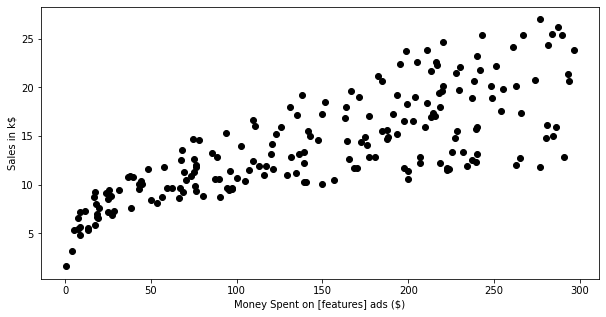

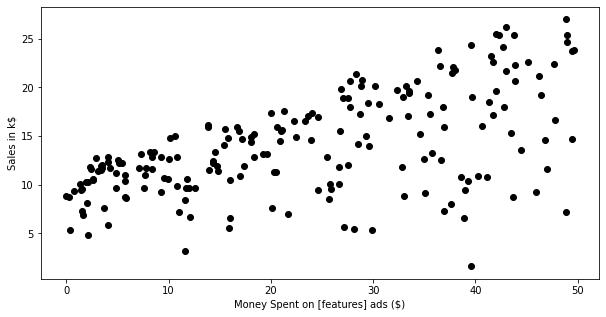

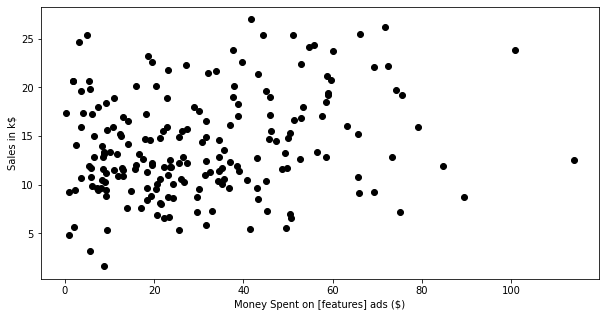

In [13]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

Plotting the GRAPHS

##Define BaseLine Model & See How Regularization Improves It

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


**from sklearn.model_selection import cross_val_score:** This imports the cross_val_score function from the model_selection module in Scikit-learn. The cross_val_score function is used to perform cross-validation on a model, which can help assess how well the model will generalize to new data.

from sklearn.linear_model import LinearRegression: This imports the LinearRegression class from the linear_model module in Scikit-learn. The LinearRegression class is used to create a linear regression model, which is a type of supervised learning model that can be used for predicting continuous values.

In [16]:
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)


The first line, X = data.drop(['sales'], axis=1), creates a new dataframe X by removing the column named 'sales' from the original dataframe data. The axis=1 argument specifies that the column should be removed (as opposed to a row, which would be axis=0). This line assumes that the 'sales' column contains the target variable or output that the model is trying to predict, and the remaining columns in data are the features or inputs that the model will use to make those predictions.

The second line, y = data['sales'].values.reshape(-1,1), creates a new numpy array y by selecting the 'sales' column from the original dataframe data. The .values attribute converts the selected column into a numpy array. The reshape(-1,1) method reshapes the array into a column vector with the same number of rows as the original array, but with only one column. This line assumes that 'sales' is the target variable that the model is trying to predict, and that it is a one-dimensional array (i.e. a column in the dataframe). The reshape method is used to ensure that the y array has the correct shape for use with machine learning models, which often require target variables to be in a specific format.

In [17]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print(-mean_MSE)

3.0729465971002106


These lines of code are used to train a linear regression model on the data and evaluate its performance using cross-validation.

The first line, lin_reg = LinearRegression(), creates an instance of the LinearRegression class, which is a machine learning model for predicting a continuous target variable based on one or more continuous input variables.

The second line, MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5), uses the cross_val_score function from scikit-learn to perform 5-fold cross-validation on the linear regression model. The function takes several arguments:

lin_reg: the model to be trained and evaluated
X: the input features for the model
y: the target variable for the model
scoring: the evaluation metric to be used (in this case, negative mean squared error, or neg_mean_squared_error)
cv: the number of folds to use in cross-validation (in this case, 5)
The cross_val_score function returns an array of negative mean squared error (MSE) values for each fold of the cross-validation.

The third line, mean_MSE = np.mean(MSEs), calculates the mean of the negative MSE values across all folds of the cross-validation.

The fourth line, print(-mean_MSE), prints the negative of the mean MSE value. This is done because scikit-learn's cross_val_score function returns negative MSE values by default, since it is intended to be used with scoring functions that maximize performance (like accuracy) rather than those that minimize error (like MSE). By negating the mean MSE value, we get the actual mean MSE of the model.




##Regularization

Ridge Regression

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge   

**GridSearchCV **is a class in scikit-learn that performs an exhaustive search over a specified parameter grid to find the set of hyperparameters that produces the best cross-validated performance for a given model. It takes several arguments, including the model to be tuned, the parameter grid to be searched over, the evaluation metric to be used, and the number of folds to be used in cross-validation.

Ridge is a class in scikit-learn that implements a Ridge regression model. Ridge regression is a regularized version of linear regression that adds a penalty term to the loss function to reduce the magnitude of the coefficients and prevent overfitting. The strength of the penalty term is controlled by the hyperparameter alpha, which can be tuned using grid search.

In [22]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10 , 20] }
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y);


The first line, ridge = Ridge(), creates an instance of the Ridge class, which is a linear regression model that uses L2 regularization to prevent overfitting. By default, the alpha hyperparameter is set to 1.0.

The second line, parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10 , 20] }, defines a dictionary of hyperparameters to be tuned using grid search. In this case, we are only tuning the alpha hyperparameter, and we are searching over a range of values from 1e-15 to 20, with a mix of very small and larger values.

The third line, ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5), creates an instance of the GridSearchCV class, which will perform the grid search for the best hyperparameters for a Ridge regression model. The ridge model is passed as the first argument, the parameters dictionary is passed as the second argument, and the scoring parameter is set to 'neg_mean_squared_error', which is a loss function to be minimized. The cv parameter is set to 5, indicating that 5-fold cross-validation should be used.

The fourth line, ridge_regressor.fit(X, y), fits the ridge_regressor object to the input data X and target variable y.

In [24]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)


{'alpha': 20}
3.072671338341143


first line, **print(ridge_regressor.best_params_)**, is likely printing out the set of hyperparameters that produced the best results according to some optimization algorithm

second line, **print(-ridge_regressor.best_score_)**, is likely printing out the negative of the best score achieved by the model. The negative of the score is used because some optimization algorithms

##Regularization 

Lasso

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso   

In [28]:
lasso = Lasso(tol=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191


Same procedures like Ridge Regression